# Ранее мы пытались выяснить, есть ли корреляция между количеством посещений новостной ленты и средней разницей между первым коммитом и дедлайном лаборатории.
# Проблема в том, что коэффициент корреляции показывает, есть ли линейная связь между двумя переменными. Но что, если она нелинейна? Как это увидеть? Правильно — рисуя графики!

In [37]:
import pandas as pd
import sqlite3
from pandas.plotting import scatter_matrix

conn = sqlite3.connect('../data/checking-logs.sqlite')

In [38]:
query = """
SELECT
    t.uid,
    ROUND(AVG(JULIANDAY(DATETIME(t.first_commit_ts)) - JULIANDAY(DATETIME(d.deadlines, 'unixepoch')))*24,3) AS avg_diff,
    pageviews,
    num_commits
FROM
    test t
JOIN
    deadlines d ON t.labname = d.labs
LEFT JOIN (SELECT uid, count(*) AS pageviews
           FROM pageviews
           GROUP BY uid) AS views ON t.uid=views.uid
LEFT JOIN (SELECT uid, count(*) AS num_commits
           FROM checker
           WHERE labname != 'project1'
           GROUP BY uid) AS ch ON t.uid=ch.uid
WHERE labname != 'project1'
GROUP BY t.uid
"""
# ROUND(AVG(JULIANDAY(DATETIME(t.first_commit_ts)) - JULIANDAY(DATETIME(d.deadlines, 'unixepoch')))*24,3) AS avg_diff - средняя разница во времени между первым коммитом и дедлайном
df = pd.read_sql_query(query, conn)

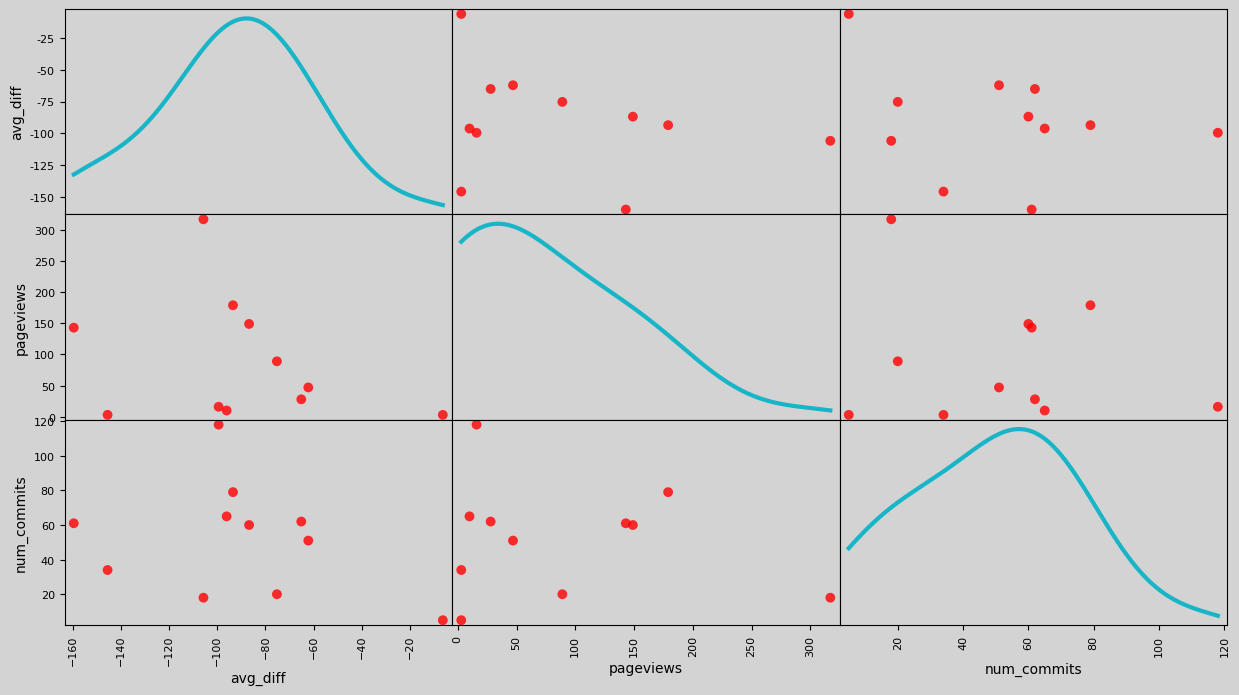

In [39]:
# Создание scatter matrix
axes = scatter_matrix(df.drop(columns='uid'), alpha=0.8, figsize=(15, 8), diagonal='kde', color = ['red']*11, s=200)
fig = axes[0, 0].get_figure()
fig.patch.set_facecolor('lightgrey')
for ax in axes.flatten():
    ax.set_facecolor('lightgrey')
for i in range(len(axes)):
    # Уходим в диагональные графики
    for line in axes[i, i].lines:  # Получаем линии на диагонали
        line.set_color('#16b5c7')
        line.set_linewidth(3) 

**Можно ли сказать, что если у пользователя мало просмотров страниц, то, скорее всего, у него мало и коммитов?**

Ответ: нет.

**Можем ли мы сказать, что если у пользователя мало просмотров страниц, то у него, скорее всего, небольшая средняя разница между первым коммитом и крайним сроком выполнения лабораторных работ?**

Ответ: нет.

**Можем ли мы сказать, что есть много пользователей с малым количеством коммитов и несколько с большим количеством коммитов?** 

Ответ: да.

**Можно ли сказать, что есть много пользователей с небольшой средней разницей и несколько с большой средней разницей?**

Ответ: нет.

In [40]:
conn.close()